# Environment I (0.5-quantile)

In this notebook, we show the simulation for the Group One design.

Group one shows quantiles and means can reflect different preference order and the quantiles are preferred by the risk-averse agents, i.e. Arm B is preferred since its less low rewards.
We compare our algorithms with the quantile-based baseline algorithms in terms of Group One design.

We consider $K = 20 + m$ arms with 15 arm A, $m$ arm B (optimal arms) and 5 arm C.
The goal is to identify $m$ arms with largest $0.5$-quantile (i.e. median).
We compare our algorithms with the quantile-based baseline algorithms:
- Quantile uniform sampling (Q-Uniform), where each arm is sampled uniformly and we select the arm with the maximum 0.5-quantile;
- Quantile Batch Elimination (Q-BE) proposed in \citet{tran-thanh_functional_2014} %, where we choose to drop one arm for each phase.
- Quantile Successive Rejects (Q-SR). 

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.BAI_FixedBudget import *
from codes.Environment import Mixture_AbsGau, setup_env, Exp
from codes.SimulatedGames import simulate
from codes.plots import *

In [2]:

# setting
results = defaultdict(dict)
num_exper = 5000
epsilon = 0


m = 5 # number of recommendation
tau = 0.5 # quantile level

if m == 1:
    budget_list = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
elif m == 5:
    budget_list = [1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000]

# output/plot setting

output_file = '../saved_results/Group_One_'  + 'm' + str(m) + '_exper_' + str(num_exper) + '_' + 'budget_' + str(budget_list[0]) + '_' + str(budget_list[-1]) 
budget_plot_title = 'BAI with '+ str(tau) + ' quantile (m=' + str(m) + ')'

In [3]:
# Reward Hist Plot

# base_environment = [
#     {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
#                      ],
#      Exp: [[1/4]]
#     } # mu1, sigma1, mu2, sigma2, p
    
# ]

# base_rewards_env, base_true_ss_dict, base_samples = setup_env(base_environment, ['quantile_' + str(tau)])
# plot_hist(base_samples)

In [4]:
# environment

environment_m1 = [
    {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
                      # [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      # [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1],  
                     ],
     Exp: [[1/4], [1/4], [1/4], [1/4], [1/4]]
    } # mu1, sigma1, mu2, sigma2, p  
]

environment_m5 = [
    {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1],  
                     ],
     Exp: [[1/4], [1/4], [1/4], [1/4], [1/4]]
    } # mu1, sigma1, mu2, sigma2, p  
]

if m == 1:
  environments = environment_m1
elif m == 5:
  environments = environment_m5
else: 
  print('Unknown environment!')

rewards_env, true_ss_dict, samples = setup_env(environments, ['quantile_' + str(tau)])
# true_ss_dict

{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[0.25], [0.25], [0.25], [0.25], [0.25]]}


In [5]:
# run experiments

def run_exper(rewards_env, summary_stats, policy, epsilon, m, budget, num_exper, 
              fixed_samples_list = None):
    for key in rewards_env.keys():
        name = key + '_' + str(num_exper)
        policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
        subname = policy_name  + str(budget) 
        p = IntProgress(max = num_exper)
        p.description = 'Running'
        display(p)
        results[name][subname] = []

        result = simulate(rewards_env[key],summary_stats[key], policy, 
                epsilon, m, budget, num_exper, p, fixed_samples_list)
        results[name][subname].append(result)

In [6]:
if not os.path.isfile(output_file):
    for budget in budget_list:
        run_exper(rewards_env, true_ss_dict, Q_SR, epsilon, m, budget, num_exper)
        run_exper(rewards_env, true_ss_dict, Q_SAR_Simplified, epsilon, m, budget, num_exper)
        run_exper(rewards_env, true_ss_dict, batch_elimination, epsilon, m, budget, num_exper)
        run_exper(rewards_env, true_ss_dict, uniform_sampling, epsilon, m, budget, num_exper)

  Budget  Probability of Error       std     Policy
0   1000                0.6886  0.046307       Q-SR
1   1000                0.6942  0.046075      Q-SAR
2   1000                0.7130  0.045236       Q-BS
3   1000                0.8260  0.037911  Q-Uniform
4   1250                0.5990  0.049010       Q-SR


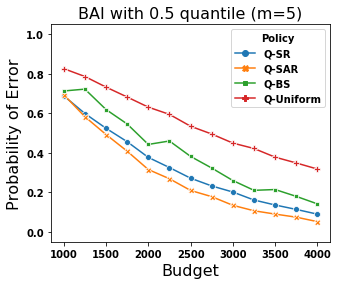

In [7]:
# save results

if os.path.isfile(output_file):
    with open(output_file, 'rb') as handle:
        results = pickle.load(handle)
else:
    with open(output_file, 'wb') as handle:
         pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

plot_eva_budget(results, 'pe', paper_flag = True, with_para = True, title = budget_plot_title, log_scale = False)